# 动态规划

# 1 动规5步曲
1. 确定dp数组（dp table）及其下标含义
2. 确定递推公式
3. 初始化递推数组
4. 确定遍历顺序
5. 举例推导dp数组

如果代码没通过就打印dp数组，看一下与自己推导的哪里不一样

# 2 509 斐波那契数

斐波那契数 （通常用 F(n) 表示）形成的序列称为 斐波那契数列 。该数列由 0 和 1 开始，后面的每一项数字都是前面两项数字的和。也就是：

F(0) = 0，F(1) = 1
F(n) = F(n - 1) + F(n - 2)，其中 n > 1
给定 n ，请计算 F(n) 


1. dp 数组及其含义

dp：F(n),dp[n],含义是 每一项数字的函数值，都是前面两项数字函数值的和

2. 确认递推公式

dp[n]=dp[n-1]+dp[n-2]

3. 初始化递推数组,0-n为n+1个数值

dp = [0 for i in range(n+1)]

dp[1] = 1

4. 确定遍历顺序

从左到右

5. 举例递推数组

dp[3] = dp[2]+dp[1] = 1+1=2

dp[2] = dp[1]+dp[0] =1+0=1

In [2]:
n=10
dp = [0 for i in range(n+1)]
dp[1] = 1
for i in range(2,n+1):
    dp[i] = dp[i-1]+dp[i-2]
print(dp)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


# 2 70爬楼梯

假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？




1. 确定dp数组及其下标含义
dp[n]代表dp能到达的方式的数量，分为达到下一层与下下层的和
2. 确认递推公式
dp[n] = dp[n-1]+dp[n-2]
3. 初始化递推数组 0-n 为n+1个
dp = [0 for i in range(n+1)]
dp[0]=0
dp[1]=1
dp[2]=2
4. 确定遍历顺序
从左往右
5. 举例
n=4
0,1,2,3,5
dp[3]=dp[2]+dp[1]=3
dp[4] = dp[3]+dp[2] = 5


In [5]:
class Solution(object):
    def climbStairs(self, n):
        dp = [0 for i in range(n+1)]
        dp[0]=0
        dp[1]=1
        dp[2]=2
        for i in range(3,n+1):
            dp[i] = dp[i-1]+dp[i-2]
        print(dp)
        return dp[-1]
Solution().climbStairs(4)

[0, 1, 2, 3, 5]


5

# 3 746最小费爬楼梯
给你一个整数数组 cost ，其中 cost[i] 是从楼梯第 i 个台阶向上爬需要支付的费用。一旦你支付此费用，即可选择向上爬一个或者两个台阶。

你可以选择从下标为 0 或下标为 1 的台阶开始爬楼梯。
请你计算并返回达到楼梯顶部的最低花费。



输入：cost = [10,15,20]
输出：15
解释：你将从下标为 1 的台阶开始。
- 支付 15 ，向上爬两个台阶，到达楼梯顶部。
总花费为 15 
dp[0]=10,dp[1]=15,dp[2]=30,dp[4]=15
1. 确认dp数组及其下标含义
dp[0]=10,dp[1]=15,dp[2]=30,dp[4]=15
dp数组长度为n+1,顶点代表登顶的数值最小花费
2. 确认递推公式
dp[i]=min(dp[i-1],dp[i-2])+cost[i])
3. 初始化dp数组
dp[0] = cost[0]
dp[1] = cost[1]
4. 确认遍历顺序
从左往右
5. 举例推导递推公式
dp[0]=10,dp[1]=15,dp[2]=30,dp[4]=15


In [22]:
class Solution(object):
    def minCostClimbingStairs(self, cost):
        dp = [0 for i in range(len(cost))]
        dp[0] = cost[0]
        dp[1] = cost[1]
        for i in range(2,len(cost)):
            dp[i] = min(dp[i-1],dp[i-2])+cost[i]
        print(dp,len(dp))
        return min(dp[-1],dp[-2])
Solution().minCostClimbingStairs(cost=[1,100,1,1,1,100,1,1,100,1,1]),(len([1,100,1,1,1,100,1,1,100,1]),)

[1, 100, 2, 3, 3, 103, 4, 5, 104, 6, 7] 11


(6, (10,))

# 4 不同路径
一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish” ）。

问总共有多少条不同的路径？

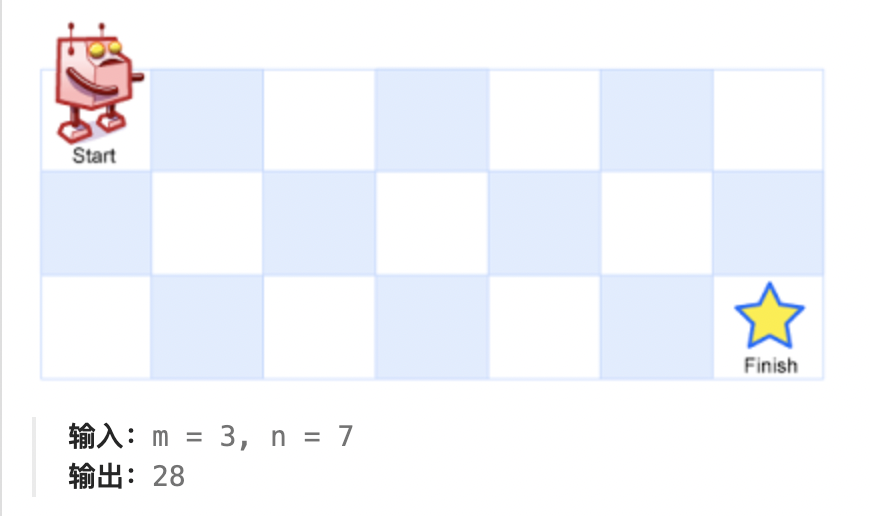

1. dp数组及其下标：dp[i][j]：到达第i行第j列的路径个数
2. dp递推公式：dp[i][j] = dp[i-1][j]+dp[i][j-1]
3. 初始化dp数组：dp[0][j]=1,dp[i][0]=1
4. 遍历dp数组，每一行从左向右遍历
5. 举例，2,3,等于6

[[1],[1],[1]]

[[1],[2],[3]]

[[1],[3],[6]]

In [1]:
class Solution(object):
    def uniquePaths(self, m, n):
        dp=[[0 for i in range(n)] for j in range(m)]
        for i in range(n):
            dp[0][i]=1
        for i in range(m):
            dp[i][0] = 1
        for i in range(1,m):
            for j in range(1,n):
                dp[i][j] = dp[i-1][j]+dp[i][j-1]
        return dp[-1][-1]
Solution().uniquePaths(3,7)

28

# 美团 64 最小路径和
给定一个包含非负整数的 m x n 网格 grid ，请找出一条从左上角到右下角的路径，使得路径上的数字总和为最小。

说明：每次只能向下或者向右移动一步

输入：grid = [[1,3,1],[1,5,1],[4,2,1]]
输出：7

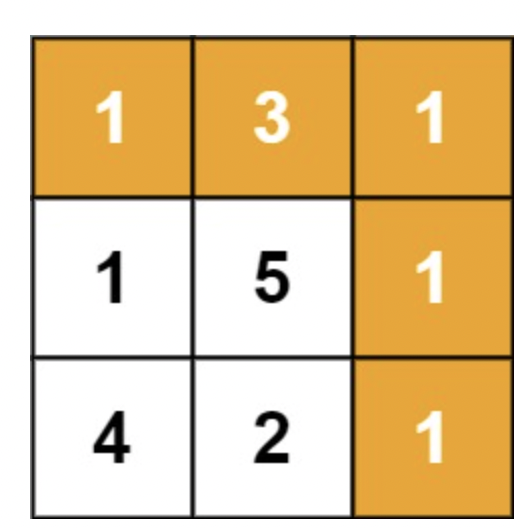

解释：因为路径 1→3→1→1→1 的总和最小

1. dp数组及其下标含义：dp[i][j]到达第i行j列的最小路径和
2. 递推公式：dp[i][j] = min(dp[i-1][j],dp[i][j-1])+grid[i][j]
3. dp数组初始化：

dp[0][i] = dp[0][i-1]+grid[0][i]

dp[i][0] = dp[i-1][0]+grid[i-1][0]
4. 遍历递推数组：
每行从左往右遍历
5. 举例



    [1,3],
    
    [1,5]



dp:


    
    [1，4]

    [2，6]




In [2]:
class Solution(object):
    def minPathSum(self, grid):
        for i in grid:
            print(i)
        m = len(grid)
        n = len(grid[0])
        dp = [[0 for i in range(n)] for j in range(m)]
        dp[0][0] = grid[0][0]
        for i in range(1,n):
            dp[0][i] = dp[0][i-1]+grid[0][i]
        for i in range(1,m):
            dp[i][0] = dp[i-1][0]+grid[i][0]            
        for i in range(1,m):
            for j in range(1,n):
                dp[i][j] = min(dp[i-1][j],dp[i][j-1])+grid[i][j]

        for i in dp:
            print(i)
        return dp[-1][-1]
Solution().minPathSum(grid = [[1,3,1],[1,5,1],[4,2,1]])

[1, 3, 1]
[1, 5, 1]
[4, 2, 1]
[1, 4, 5]
[2, 7, 6]
[6, 8, 7]


7

# 63 带障碍物的
一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish”）。

现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

网格中的障碍物和空位置分别用 1 和 0 来表示。

## 动规5步曲
1. 确定dp数组（dp table）及其下标含义
2. 确定递推公式
3. 初始化递推数组
4. 确定遍历顺序
5. 举例推导dp数组

1. 确定dp数组（dp table）及其下标含义
dp[i][j]：到达第i行第j列的路径个数
2. 确定递推公式
dp[i][j] = dp[i-1][j]+dp[i][j-1]
3. 初始化递推数组
dp[0][j]=1,dp[i][0]=1
但遇到障碍物，break
4. 确定遍历顺序
从左往右，从上到下
5. 举例推导dp数组

In [20]:
class Solution(object):
    def uniquePathsWithObstacles(self, obstacleGrid):
        m = len(obstacleGrid)
        n = len(obstacleGrid[0])
        dp = [[0 for i in range(n)] for j in range(m)]
        dp[0][0] = 1 if obstacleGrid[0][0]==0 else 0
        if m==1 or n==1:
            for i in obstacleGrid[0]:
                if i==1:
                    return 0
        for i in range(1,n):
            if obstacleGrid[0][i-1] ==1 or obstacleGrid[0][i]==1:
                break
            else:
                dp[0][i] = 1
        for i in range(1,m):
            if obstacleGrid[i-1][0] ==1 or obstacleGrid[i][0]==1:
                break
            else:
                dp[i][0] = 1  
        for i in range(1,m):
            for j in range(1,n):
                if obstacleGrid[i][j]==1:
                    continue
                else:
                    dp[i][j] = dp[i-1][j]+dp[i][j-1]
        print(dp)
        return dp[-1][-1]
Solution().uniquePathsWithObstacles(obstacleGrid = [[0,1],[0,0]])

[[1, 0], [1, 1]]


1

# 343 整数拆分

## 动规5步曲
1. 确定dp数组（dp table）及其下标含义
2. 确定递推公式
3. 初始化递推数组
4. 确定遍历顺序
5. 举例推导dp数组

1. 确定dp数组（dp table）及其下标含义
dp[i]:拆分i的整数的乘积最大化
2. 确定递推公式
dp[i] = max(dp[i],dp[i-j]*j,(i-j)*j)
3. 初始化递推数组
dp[0] = 0
dp[1] = 1
dp[2] = 1
dp[i] = i-1
4. 确定遍历顺序
先由左到右
然后再由左到当前-1
5. 举例推导dp数组
dp[3] = max(dp[i],dp[2]*1)
dp[2] = 1
dp[3] = 2
dp[4] = max(dp)


In [25]:
class Solution(object):
    def integerBreak(self, n):
        dp = [0 for i in range(n+1)]
        dp[1] = 1
        dp[2] = 1
        if n<3:
            return dp[n]
        for i in range(3,n+1):
            dp[i] = i-1
        for i in range(3,n+1):
            for j in range(2,i):
                dp[i] = max(dp[i],j*dp[i-j],j*(i-j))
        print(dp)
        return dp[-1]
Solution().integerBreak(n=10)

[0, 1, 1, 2, 4, 6, 9, 12, 18, 27, 36]


36

# 不同的二叉搜索树
给你一个整数 n ，求恰由 n 个节点组成且节点值从 1 到 n 互不相同的 二叉搜索树 有多少种？返回满足题意的二叉搜索树的种数。

## 动规5步曲
1. 确定dp数组（dp table）及其下标含义
dp[i] = i个数值组成的最大的二叉搜索树
2. 确定递推公式
dp[i] = sum([dp[j]*dp[i-j-1] for j in range(i)])
左右节点数🟰中间节点数➖1
3. 初始化递推数组
dp[0]=1
dp[1]=1
4. 确定遍历顺序
从左到右，从左到目前
5. 举例推导dp数组
n=4
dp[4] = sum([dp[j]*dp[3-j] for j in range(4)])
=dp[0]*dp[3]+dp[1]*dp[2]+dp[2]*dp[1]+dp[3]*dp[0] = 14
dp[3] = dp[0]*dp[2]+dp[1]*dp[1]+dp[2]*dp[0] = 5
dp[2] = dp[0]*dp[1]+dp[1]*dp[0] = 2

In [26]:
class Solution(object):
    def numTrees(self, n):
        dp = [0 for i in range(n+1)]
        dp[0] = 1
        dp[1] = 1
        for i in range(2,n+1):
            dp[i] = sum(dp[j]*dp[i-1-j] for j in range(i))
        print(dp) 
        return dp[-1]
Solution().numTrees(n=4)

[1, 1, 2, 5, 14]


14

# 分割等和字串

给你一个 只包含正整数 的 非空 数组 nums 。请你判断是否可以将这个数组分割成两个子集，使得两个子集的元素和相等。

背包容量为nums/2
物品的体积与物品的价值相同
一半的容量刚好装满则可以划分为两个子集

1. 确定dp数组（dp table）及其下标含义 dp[i][j]代表背包装到第i个元素的j容量的最大数值
2. 确定递推公式 dp[i][j]=max(dp[i-1][j],dp[i-1][j-nums[i]])
3. 初始化递推数组 
dp[0][j] = 0 if j<nums[0] else nums[0]
dp[i][0] = 0
4. 确定遍历顺序
for i in range(1,len(nums)):
    for j in range(1,j):
5. 举例推导dp数组
nums = [1,5,11,5]

返回dp[-1][j]

In [15]:
class Solution(object):
    def canPartition(self, nums):
        n = len(nums)
        sum_all = sum(nums)
        if sum_all%2!=0:
            return False
        sum_all = sum_all//2
        dp = [[0 for i in range(sum_all+1)] for j in range(n)]
        for i in range(n):
            dp[i][0] = 0
        for j in range(sum_all+1):
            dp[0][j] = nums[0] if j>=nums[0] else 0
        for i in range(1,n):
            for j in range(1,sum_all+1):
                if j>=nums[i]:
                    dp[i][j] = max(dp[i-1][j],nums[i]+dp[i-1][j-nums[i]])
                else:
                    dp[i][j] = dp[i-1][j]
        for i in dp:
            print(i)
        return dp[-1][-1]==sum_all
Solution().canPartition(nums=[1,5,11,5])

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 5, 6, 6, 6, 6, 6, 6]
[0, 1, 1, 1, 1, 5, 6, 6, 6, 6, 6, 11]
[0, 1, 1, 1, 1, 5, 6, 6, 6, 6, 10, 11]


True

# 494. 目标和

给你一个非负整数数组 nums 和一个整数 target 。

向数组中的每个整数前添加 '+' 或 '-' ，然后串联起所有整数，可以构造一个 表达式 ：

例如，nums = [2, 1] ，可以在 2 之前添加 '+' ，在 1 之前添加 '-' ，然后串联起来得到表达式 "+2-1" 。
返回可以通过上述方法构造的、运算结果等于 target 的不同 表达式 的数目。

划分为左右两部分，left-right = target,left+right = sum
left = (target+sum)//2
物品价值与体积相同
1. 确定dp数组（dp table）及其下标含义
dp[i][j] 代表选择到第i个元素，背包容量为j时，装满j的最大方法数
2. 确定递推公式
i = 3,j = 3时

不要nums[i] :i=2时j=3的次数

+

要nums[i] i=2时j=3-nums[i]的次数
if j>nums[i]:
    dp[i][j] = dp[i-1][j]+dp[i-1][j-nums[i]]
else:
    dp[i][j] = dp[i-1][j]
选择一个最大值
3. 初始化递推数组
for i in range(left+1):
    dp[0][i] = 0 if i!=nums[0] else nums[0]
for i in range(1,len(nums)):
    dp[0][i]=1
4. 确定遍历顺序
5. 举例推导dp数组
[1,1,1,1,1] tar=3 left=4
  0, 1, 2, 3, 4
1[1, 1, 0, 0, 0]
1[1, 2, 1, 0, 0]
1[1, 3, 3, 1, 0]
1[1, 4, 6, 4, 0]
1[1, 0, 0, 0, 0]


In [28]:
class Solution(object):
    def findTargetSumWays(self, nums, target):
        target = abs(target)
        left = (target+sum(nums))//2
        if abs(sum(nums))<abs(target) or (target+sum(nums))%2!=0:
            return 0
        dp = [[0 for i in range(left+1)] for j in nums]
        for i in range(left+1):
            dp[0][i] = 0 if i!=nums[0] else 1
        for i in range(len(nums)):
            if nums[i] != 0:
                dp[i][0]=1
            else:
                dp[i][0]=2

        for i in range(1,len(nums)):
            # if nums[i]!=0:
            for j in range(left+1):            
                dp[i][j] = dp[i-1][j]+dp[i-1][j-nums[i]]
            # else:
            #     for j in range(left+1):
            #         dp[i][j] = 2*dp[i-1][j]
            
        for i in dp:
            print(i)
        return dp[-1][-1]
Solution().findTargetSumWays(nums=[0,0,0,0,0,0,0,3],target=3)

[2, 0, 0, 0]
[4, 0, 0, 0]
[8, 0, 0, 0]
[16, 0, 0, 0]
[32, 0, 0, 0]
[64, 0, 0, 0]
[128, 0, 0, 0]
[128, 0, 0, 128]


128

# 474. 一和零

给你一个二进制字符串数组 strs 和两个整数 m 和 n 。

请你找出并返回 strs 的最大子集的长度，该子集中 最多 有 m 个 0 和 n 个 1 。

如果 x 的所有元素也是 y 的元素，集合 x 是集合 y 的 子集 。

## 动规5步曲
1. 确定dp数组（dp table）及其下标含义
dp[i][j][k]代表放到第i个字串，第j个0，第k个1的子集的最大长度
2. 确定递推公式
dp[i][i][k] = max(dp[i-1][j-zero_nums][k-one_nums]+1,dp[i-1][j][k])
3. 初始化递推数组
01背包初始化为0即可
4. 确定遍历顺序
每个物品每个m，每个n
5. 举例推导dp数组

In [3]:
import copy
class Solution(object):
    def findMaxForm(self, strs, m, n):
        all_m,all_n = 0,0
        for i in strs:
            for j in i:
                if j=='0':
                    all_m+=1
                else:
                    all_n+=1
        if all_m<m and all_n < n:
            return len(strs)
        dp = [[[0 for k in range(n+1)] for j in range(m+1)] for i in range(len(strs))]
        for i in range(len(strs)):
            zero_nums,one_nums = 0,0
            for _ in strs[i]:
                if _ =='0':
                    zero_nums+=1
                else:
                    one_nums+=1
            dp[i]=copy.deepcopy(dp[i-1])
            for j in range(zero_nums,m+1):
                for k in range(one_nums,n+1):
                    dp[i][j][k] = max(dp[i-1][j-zero_nums][k-one_nums]+1,dp[i-1][j][k])
        return dp[-1][-1][-1]
Solution().findMaxForm(strs=["10","0","1"],m=1,n=1)


[0, 0]
[0, 1]


[0, 0]
[1, 1]


[0, 1]
[1, 2]




2